In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import VotingRegressor
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import optuna

import warnings
warnings.filterwarnings("ignore")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,na,8.0,AS8,Z,33.71 L/100 km,12.99 km per L,4.54 km per L,275.0
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41 km per L,0.87 L/100 km,59.38 MPG (AS),166.0
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.,181.0
137139,137140,TOYOTI,COMPACT,1.8,4.0,na,X,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km,123.0


In [4]:
test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.40 km/L,1.77 L/100 km,25.04 MPG (AS)
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.11 L/100km,14.38 liters per 100 km,5.53 km per L
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,9.60 MPG (AS),27.45 mpg Imp.,12.99 MPG (AS)
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,1.68 L/10km,6.29 km/L,16.42 L/100km
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,5.65 MPG (AS),14.75 mpg Imp.,31.52 L/100km
...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,15.39 mpg Imp.,2.09 L/10km,1.95 L/10km
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,38.00 MPG (AS),35.64 MPG (AS),15.69 km/L
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.90 km/L,21.38 MPG (AS),18.20 MPG (AS)
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,27.93 MPG (AS),51.20 MPG (AS),42.16 mpg Imp.


In [75]:
test = pd.read_csv('test_convert_removeout.csv')

In [76]:
test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.400000,1.770000,9.393371
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.110000,14.380000,5.530000
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,24.501042,10.290710,18.107005
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,16.800000,6.290000,16.420000
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,NaN,19.151186,NaN
...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,18.354776,20.900000,19.500000
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,6.189737,6.599607,15.690000
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.900000,11.001403,12.923626
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,8.421411,4.593945,6.700190


In [3]:
def konversi(df, col):
    df[col] = df[col].str.replace(' ', '')
    df[col] = df[col].str.replace('litersper100km', '')
    df[col] = df[col].str.replace('L/100km', '')
    df[col] = df[col].str.replace('L/10km', '*10')#'/10')
    df[col] = df[col].str.replace('MPG(AS)', '**(-1)* 235.21')
    df[col] = df[col].str.replace('km/L', '')#**(-1) /100')
    df[col] = df[col].str.replace('kmperL', '')#'**(-1) /100')
    df[col] = df[col].str.replace('mpgImp.', '**(-1)* 282.48')
    df[col] = df[col].str.replace('not-available', '-1')
    df[col] = df[col].str.replace('zero', '0')
    df[col] = df[col].fillna("-1")
    for idx in df.index:
        df.at[idx, col] = eval(df.at[idx, col])
    df[col] = df[col].astype(float)
    df[col].values[df[col] > 100] = np.nan
    df[col].values[df[col] < 0] = np.nan

In [39]:
konversi(train, 'Fuel Consumption City')
konversi(train, 'Fuel Consumption Hwy')
konversi(train, 'Fuel Consumption Comb')
konversi(test, 'Fuel Consumption City')
konversi(test, 'Fuel Consumption Hwy')
konversi(test, 'Fuel Consumption Comb')

In [9]:
train[~(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull())& (train['Fuel Consumption Comb'].isnull())]

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.520000,15.900000,NaN,270.0
9,10,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.840000,18.130000,NaN,202.0
41,42,KIO,STATION WAGON - SMALL,1.6,4.0,AS6,X,23.022005,10.520000,NaN,212.0
42,43,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,AS6,X,14.090000,6.730000,NaN,282.0
58,59,CHEVO,SUV - SMALL,2.4,4.0,A6,E,42.200000,2.640000,NaN,228.0
...,...,...,...,...,...,...,...,...,...,...,...
136874,136875,FOLD,PICKUP TRUCK - STANDARD,3.3,NaN,AS6,X,6.793651,17.130000,NaN,292.0
137018,137019,CADILUXE,SUV - STANDARD,6.2,8.0,A8,Z,13.799707,1.387835,NaN,351.0
137024,137025,DOGE,FULL-SIZE,3.6,6.0,A8,unknown,9.370000,17.523573,NaN,248.0
137090,137091,FIAR,MINICOMPACT,1.4,4.0,M5,X,13.089037,1.570000,NaN,195.0


In [50]:
train.loc[~(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull()) & (train['Fuel Consumption Comb'].isnull()), 'Fuel Consumption Comb'] = (train['Fuel Consumption City']+train['Fuel Consumption Hwy'])/2
train.loc[(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull()) & ~(train['Fuel Consumption Comb'].isnull()), 'Fuel Consumption City'] = (2*train['Fuel Consumption Comb']-train['Fuel Consumption Hwy'])
train.loc[~(train['Fuel Consumption City'].isnull()) & (train['Fuel Consumption Hwy'].isnull()) & ~(train['Fuel Consumption Comb'].isnull()), 'Fuel Consumption Hwy'] = (2*train['Fuel Consumption Comb']-train['Fuel Consumption City'])

In [78]:
test.loc[~(test['Fuel Consumption City'].isnull()) & ~(test['Fuel Consumption Hwy'].isnull()) & (test['Fuel Consumption Comb'].isnull()), 'Fuel Consumption Comb'] = (test['Fuel Consumption City']+test['Fuel Consumption Hwy'])/2
test.loc[(test['Fuel Consumption City'].isnull()) & ~(test['Fuel Consumption Hwy'].isnull()) & ~(test['Fuel Consumption Comb'].isnull()), 'Fuel Consumption City'] = (2*test['Fuel Consumption Comb']-test['Fuel Consumption Hwy'])
test.loc[~(test['Fuel Consumption City'].isnull()) & (test['Fuel Consumption Hwy'].isnull()) & ~(test['Fuel Consumption Comb'].isnull()), 'Fuel Consumption Hwy'] = (2*test['Fuel Consumption Comb']-test['Fuel Consumption City'])

In [74]:
test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,TransmisiHuruf,TransmisiAngka,TransmisiHurufPisah
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.400000,1.770000,9.393371,AS,8,A
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.110000,14.380000,5.530000,AS,6,A
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,24.501042,10.290710,18.107005,AV,6,A
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,16.800000,6.290000,16.420000,AS,8,A
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,NaN,19.151186,NaN,AS,8,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,18.354776,20.900000,19.500000,A,6,A
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,6.189737,6.599607,15.690000,AS,6,A
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.900000,11.001403,12.923626,A,6,A
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,8.421411,4.593945,6.700190,AS,6,A


In [72]:
train.loc[train['Hwy Imputed'], 'Fuel Consumption Hwy'] = (2*train['Fuel Consumption Comb']-train['Fuel Consumption City'])
train.loc[train['City Imputed'], 'Fuel Consumption City'] = (2*train['Fuel Consumption Comb']-train['Fuel Consumption Hwy'])

In [77]:
test['Comb Imputed'] = ~(test['Fuel Consumption City'].isnull()) & ~(test['Fuel Consumption Hwy'].isnull()) & (test['Fuel Consumption Comb'].isnull())
test['City Imputed'] = (test['Fuel Consumption City'].isnull()) & ~(test['Fuel Consumption Hwy'].isnull()) & ~(test['Fuel Consumption Comb'].isnull())
test['Hwy Imputed'] = ~(test['Fuel Consumption City'].isnull()) & (test['Fuel Consumption Hwy'].isnull()) & ~(test['Fuel Consumption Comb'].isnull())

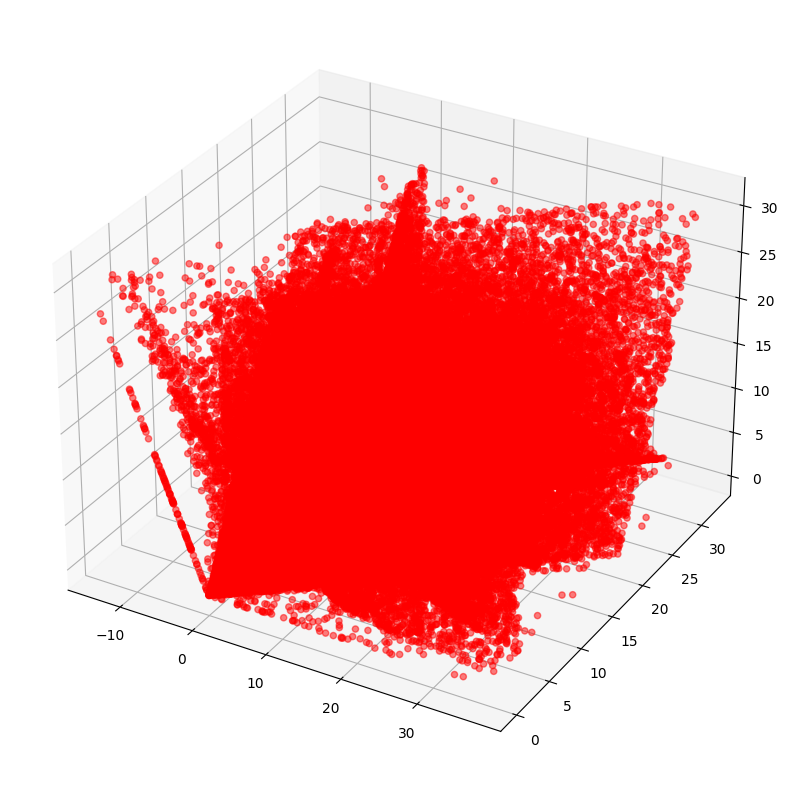

In [52]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['Fuel Consumption City'],train['Fuel Consumption Comb'],train['Fuel Consumption Hwy'],c='red', marker='o', alpha=0.5)

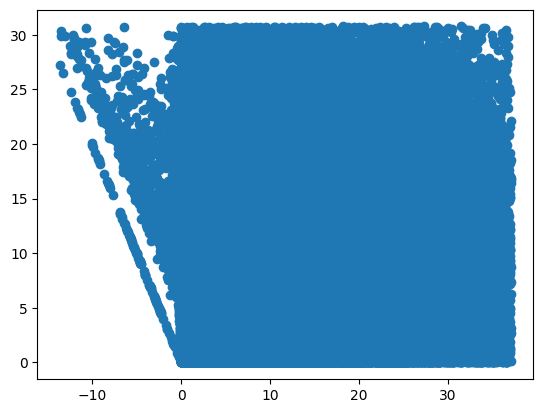

In [54]:
plt.plot(train['Fuel Consumption City'], train['Fuel Consumption Hwy'], 'o')

In [48]:
train['Comb Imputed'] = ~(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull()) & (train['Fuel Consumption Comb'].isnull())
train['City Imputed'] = (train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull()) & ~(train['Fuel Consumption Comb'].isnull())
train['Hwy Imputed'] = ~(train['Fuel Consumption City'].isnull()) & (train['Fuel Consumption Hwy'].isnull()) & ~(train['Fuel Consumption Comb'].isnull())

In [49]:
train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Comb Imputed,City Imputed,Hwy Imputed
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64,6.140000,7.514765,306.0,False,False,False
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27,30.760000,28.840000,283.0,False,False,False
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,1.70,2.030000,0.000000,329.0,False,False,False
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52,15.900000,NaN,270.0,True,False,False
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15,6.000000,13.800000,193.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,na,8.0,AS8,Z,33.71,12.990000,4.540000,275.0,False,False,False
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41,0.870000,3.961098,166.0,False,False,False
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99,8.380000,5.412531,181.0,False,False,False
137139,137140,TOYOTI,COMPACT,1.8,4.0,na,X,11.48,0.221407,6.400000,123.0,False,False,False


In [34]:
train[~(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull())& (train['Fuel Consumption Comb'].isnull())]

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)


In [37]:
train.loc[(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull()) & ~(train['Fuel Consumption Comb'].isnull()), 'Fuel Consumption City'] = 2*train['Fuel Consumption Comb']-train['Fuel Consumption Hwy']

In [70]:
test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,TransmisiHuruf,TransmisiAngka,TransmisiHurufPisah
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.400000,1.770000,9.393371,AS,8,A
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.110000,14.380000,5.530000,AS,6,A
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,24.501042,10.290710,18.107005,AV,6,A
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,16.800000,6.290000,16.420000,AS,8,A
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,NaN,19.151186,NaN,AS,8,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,18.354776,20.900000,19.500000,A,6,A
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,6.189737,6.599607,15.690000,AS,6,A
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.900000,11.001403,12.923626,A,6,A
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,8.421411,4.593945,6.700190,AS,6,A


In [35]:
train['Fuel Consumption Comb'].isnull().sum()

2620

In [10]:
temp = train[~(train['Fuel Consumption City'].isnull()) & ~(train['Fuel Consumption Hwy'].isnull())& (train['Fuel Consumption Comb'].isnull())]
temp['Fuel Consumption Comb'] = (temp['Fuel Consumption City'] + temp['Fuel Consumption Hwy'] )/2

In [11]:
temp

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.520000,15.900000,11.210000,270.0
9,10,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.840000,18.130000,30.985000,202.0
41,42,KIO,STATION WAGON - SMALL,1.6,4.0,AS6,X,23.022005,10.520000,16.771002,212.0
42,43,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,AS6,X,14.090000,6.730000,10.410000,282.0
58,59,CHEVO,SUV - SMALL,2.4,4.0,A6,E,42.200000,2.640000,22.420000,228.0
...,...,...,...,...,...,...,...,...,...,...,...
136874,136875,FOLD,PICKUP TRUCK - STANDARD,3.3,NaN,AS6,X,6.793651,17.130000,11.961825,292.0
137018,137019,CADILUXE,SUV - STANDARD,6.2,8.0,A8,Z,13.799707,1.387835,7.593771,351.0
137024,137025,DOGE,FULL-SIZE,3.6,6.0,A8,unknown,9.370000,17.523573,13.446787,248.0
137090,137091,FIAR,MINICOMPACT,1.4,4.0,M5,X,13.089037,1.570000,7.329519,195.0


In [22]:
((train['Fuel Consumption City'] + train['Fuel Consumption Hwy'])/2 -train['Fuel Consumption Comb']).describe()

count    109458.000000
mean         -0.151593
std           6.352640
min         -27.510000
25%          -1.580000
50%          -0.162176
75%           0.899941
max          31.158946
dtype: float64

In [41]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    df[col].values[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)] = np.nan
    #sns.boxplot(df[col])

In [42]:
remove_outliers(train, 'Fuel Consumption City')

In [43]:
remove_outliers(train, 'Fuel Consumption Hwy')

In [44]:
remove_outliers(train, 'Fuel Consumption Comb')

In [45]:
remove_outliers(test, 'Fuel Consumption City')
remove_outliers(test, 'Fuel Consumption Hwy')
remove_outliers(test, 'Fuel Consumption Comb')

In [46]:
train.to_csv('train_convert_removeout.csv', index=False)
test.to_csv('test_convert_removeout.csv', index=False)

<Axes: >

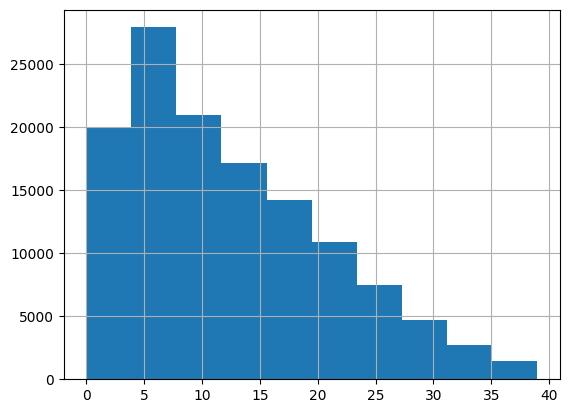

In [9]:
train['Fuel Consumption City'].hist()

In [10]:
print(train['Fuel Consumption City'].unique())
print(train['Fuel Consumption City'].nunique())
print(train['Fuel Consumption City'].median())

[ 8.64       27.27        1.7        ...  3.6097299   5.01620815
  6.0434224 ]
17019
10.667120181405895


In [11]:
def check_impute(df, col, mod):
    after = df[col]
    print("Banyaknya data null: ", after.isnull().sum())
    after = after.fillna(mod)
    sns.displot(df, x = col, kind='kde')
    sns.displot(after, kind='kde')

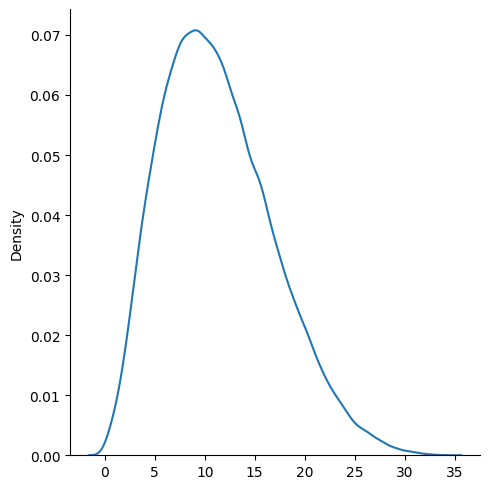

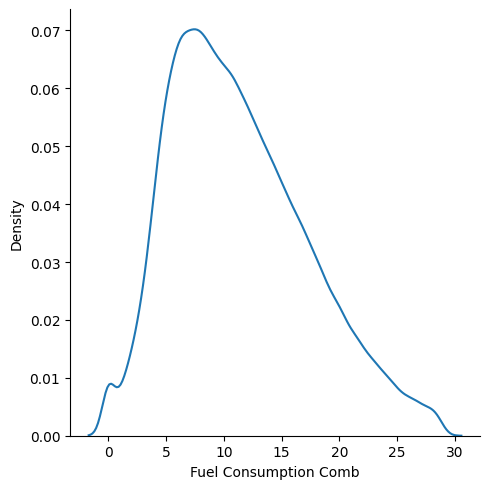

In [23]:
sns.displot((train['Fuel Consumption City'] + train['Fuel Consumption Hwy'])/2, kind='kde')
sns.displot(train['Fuel Consumption Comb'], kind='kde')

In [15]:
train['Fuel Consumption Comb'].describe()

count    131782.000000
mean         12.111574
std           7.610558
min           0.000000
25%           6.920000
50%          10.745089
75%          15.701602
max          99.820000
Name: Fuel Consumption Comb, dtype: float64

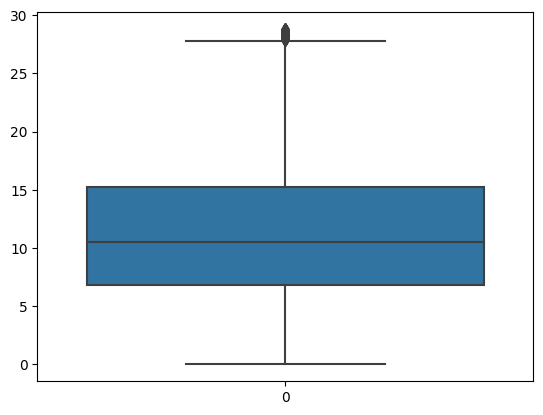

In [18]:
remove_outliers(train, 'Fuel Consumption Comb')

Banyaknya data null:  9799


Banyaknya data null:  9799


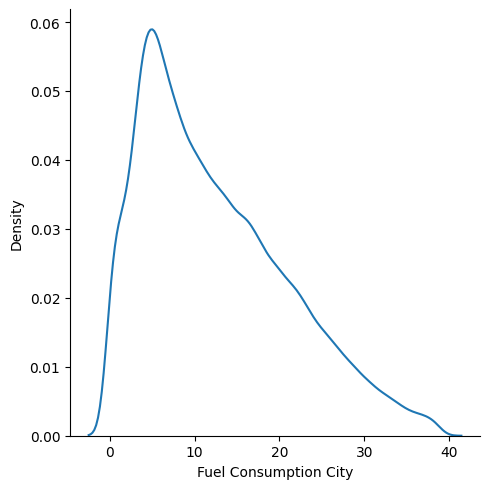

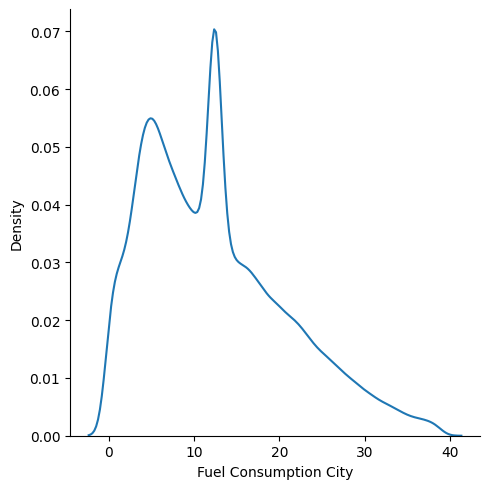

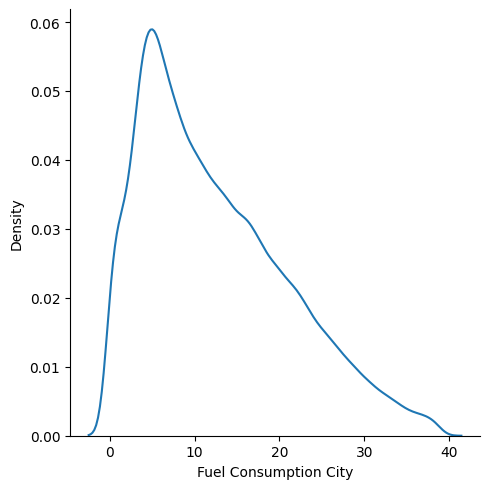

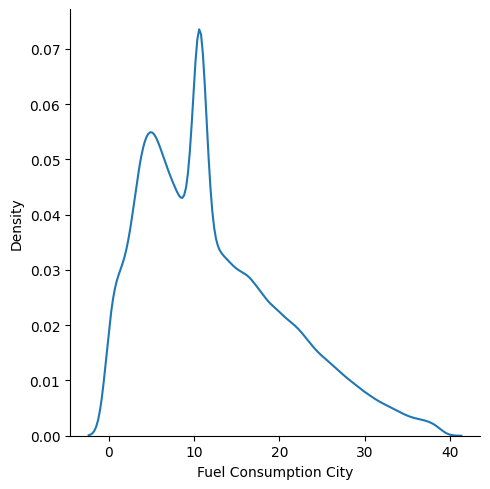

In [12]:
check_impute(train, 'Fuel Consumption City', train['Fuel Consumption City'].mean())
check_impute(train, 'Fuel Consumption City', train['Fuel Consumption City'].median())

In [13]:
konversi(train, 'Fuel Consumption Hwy')

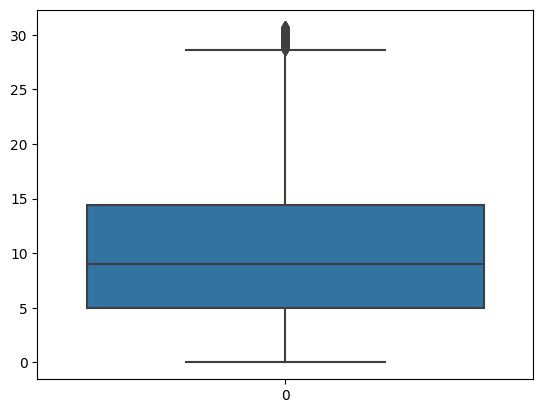

In [14]:
remove_outliers(train, 'Fuel Consumption Hwy')

Banyaknya data null:  12521
Banyaknya data null:  12521


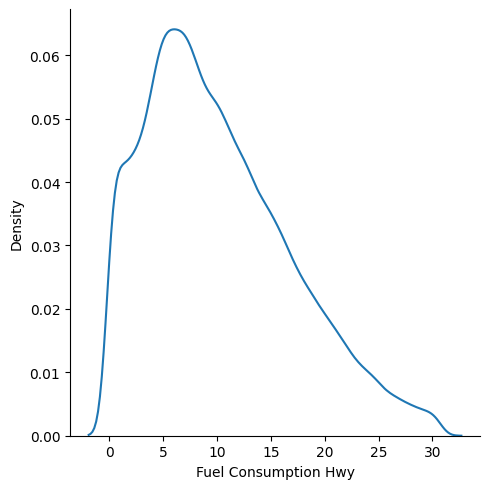

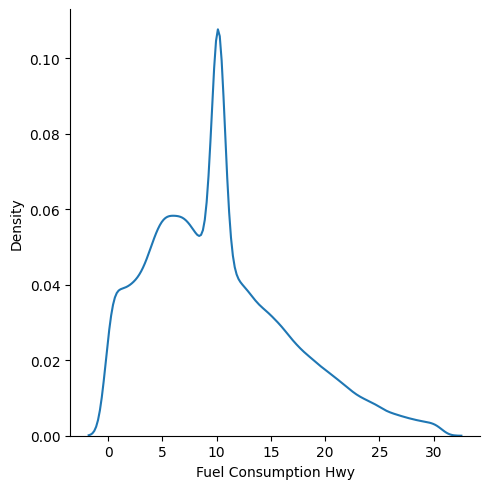

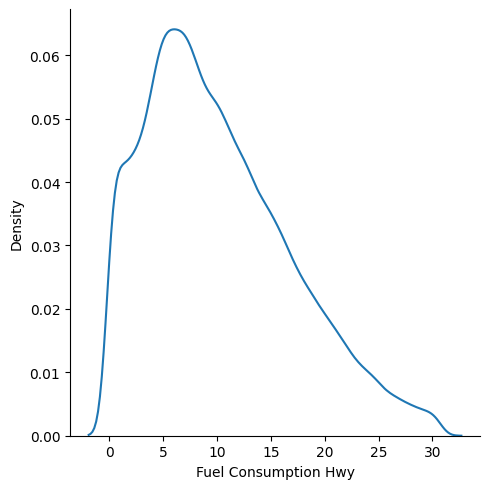

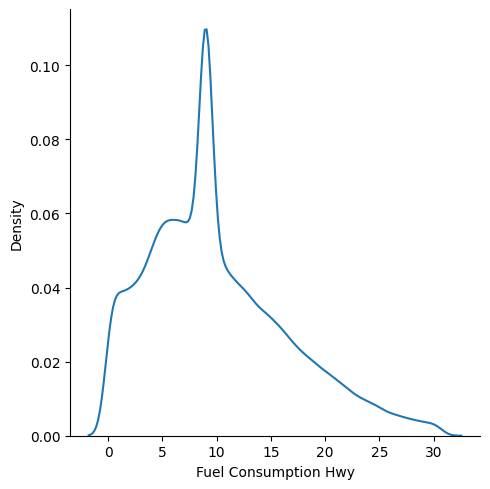

In [15]:
check_impute(train, 'Fuel Consumption Hwy', train['Fuel Consumption Hwy'].mean())
check_impute(train, 'Fuel Consumption Hwy', train['Fuel Consumption Hwy'].median())

In [16]:
konversi(train, 'Fuel Consumption Comb')

Banyaknya data null:  5359
Banyaknya data null:  5359


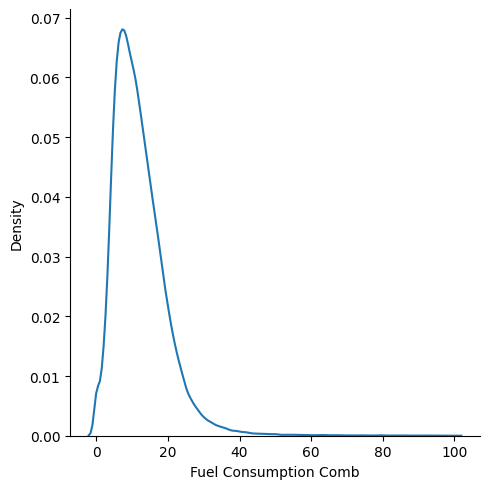

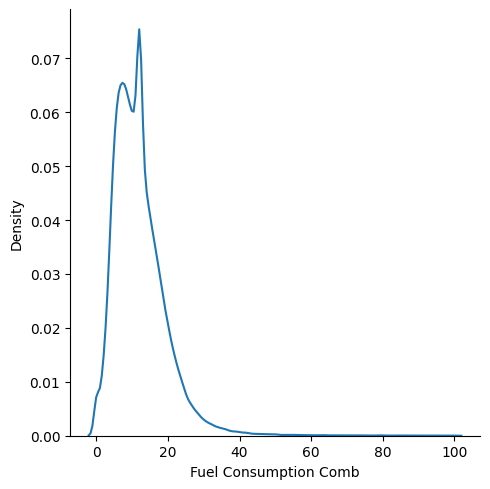

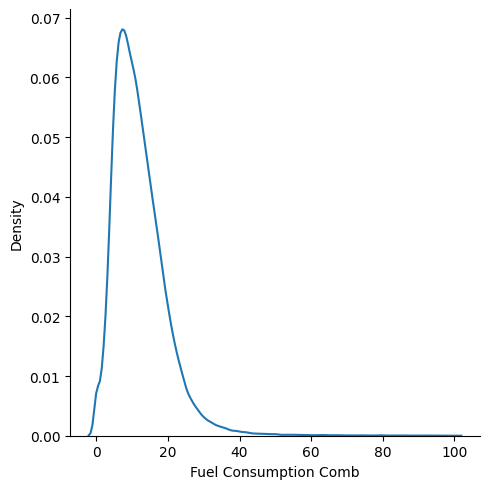

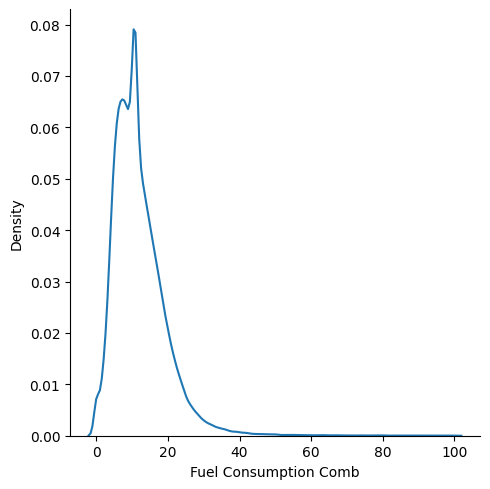

In [17]:
check_impute(train, 'Fuel Consumption Comb', train['Fuel Consumption Comb'].mean())
check_impute(train, 'Fuel Consumption Comb', train['Fuel Consumption Comb'].median())

In [ ]:
for elm in train['Make'].unique():
    plt.figure(figsize=(10, 5))
    sns.histplot(train[train['Make'] == elm]['Fuel Consumption City'])
    plt.title(elm)
    plt.show()

In [19]:
train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64,6.140000,7.514765,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27,30.760000,28.840000,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,1.70,2.030000,0.000000,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52,15.900000,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15,6.000000,13.800000,193.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,na,8.0,AS8,Z,33.71,12.990000,4.540000,275.0
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41,0.870000,3.961098,166.0
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99,8.380000,5.412531,181.0
137139,137140,TOYOTI,COMPACT,1.8,4.0,na,X,11.48,0.221407,6.400000,123.0


In [20]:
train['Engine Size(L)'].unique()

array(['3.5', '5.3', '4.4', nan, '3.0', 'unspecified', '1.8', '2.0',
       '3.6', '2.5', 'missing', '2.4', '2.3', '1.4', '1.6', '5.0', 'na',
       '1.3', '6.2', '4.8', '2.7', '6.0', '3.2', '6.5', '5.7', '3.7',
       '1.2', '4.0', '3.3', '1.5', 'not-available', '5.2', 'not-recorded',
       '3.8', '2.8', '-1', 'unknown', 'unestablished', '4.6', '6.4',
       '4.3', '6.6', '5.4', '1.0', '5.6', '5.8', '8.4', '3.4', '4.2',
       '6.8', '2.2'], dtype=object)

In [55]:
def remove_unknown(df, col):
    for unknown in ['unspecified', 'missing', 'not-available', 'not-recorded', 'unknown', 'unestablished', '-1', 'na']:
        df[col].values[df[col] == unknown] = np.nan

In [56]:
for col in train.columns[2:]:
    remove_unknown(train, col)

In [57]:
for col in train.columns:
    print(train[col].unique())

[     1      2      3 ... 137139 137140 137141]
['FOLD' 'CHEVO' 'BMV' 'KIO' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER'
 'FOLKSWA' 'TOYOTI' 'JIPU' 'TOLVO' 'ASURA' 'NIRRAN' 'FIAR' 'DOGE'
 'CADILUXE' 'MATSUDA' 'MITSU' 'RYUNDAI' 'LAMBOGI']
['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
 'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
 nan 'PICKUP TRUCK - SMALL' 'TWO-SEATER' 'STATION WAGON - MID-SIZE'
 'MID-SIZE' 'SPECIAL PURPOSE VEHICLE' 'VAN - PASSENGER' 'VAN - CARGO']
['3.5' '5.3' '4.4' nan '3.0' '1.8' '2.0' '3.6' '2.5' '2.4' '2.3' '1.4'
 '1.6' '5.0' '1.3' '6.2' '4.8' '2.7' '6.0' '3.2' '6.5' '5.7' '3.7' '1.2'
 '4.0' '3.3' '1.5' '5.2' '3.8' '2.8' '4.6' '6.4' '4.3' '6.6' '5.4' '1.0'
 '5.6' '5.8' '8.4' '3.4' '4.2' '6.8' '2.2']
['6.0' nan '4.0' '8.0' '12.0' '3.0' '5.0' '10.0']
['A6' 'M6' 'AS6' nan 'AV7' 'AS8' 'A9' 'AV' 'AV8' 'M5' 'A8' 'AV6' 'AS10'
 'AM7' 'A4' 'A5' 'AS7' 'AM6' 'AS5' 'AS9' 'AM9' 'AV10' 'AM8' 'M7' 'A10'
 'A7']
['X' 'E' 'Z' nan 'D' 'N']

In [58]:
train[['TransmisiHuruf', 'TransmisiAngka']] = train['Transmission'].str.extract('([A-Za-z]+)([0-9]+)', expand=True)

In [79]:
test[['TransmisiHuruf', 'TransmisiAngka']] = test['Transmission'].str.extract('([A-Za-z]+)([0-9]+)', expand=True)

<Axes: >

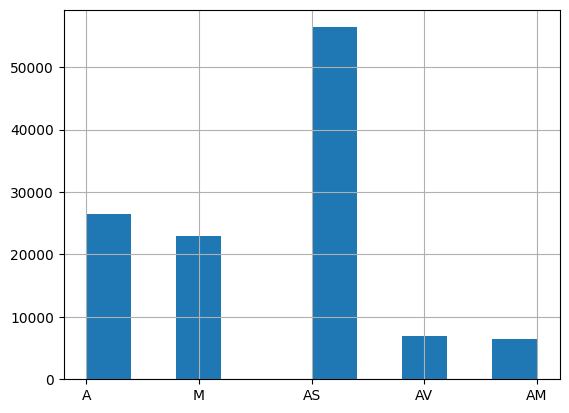

In [60]:
train['TransmisiHuruf'].hist()

In [66]:
train['TransmisiHurufPisah'] = train['TransmisiHuruf'].str[0]

In [80]:
test['TransmisiHurufPisah'] = test['TransmisiHuruf'].str[0]

In [81]:
test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Comb Imputed,City Imputed,Hwy Imputed,TransmisiHuruf,TransmisiAngka,TransmisiHurufPisah
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.400000,1.770000,9.393371,False,False,False,AS,8,A
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.110000,14.380000,5.530000,False,False,False,AS,6,A
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,24.501042,10.290710,18.107005,False,False,False,AV,6,A
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,16.800000,6.290000,16.420000,False,False,False,AS,8,A
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,NaN,19.151186,NaN,False,False,False,AS,8,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,18.354776,20.900000,19.500000,False,False,False,A,6,A
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,6.189737,6.599607,15.690000,False,False,False,AS,6,A
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.900000,11.001403,12.923626,False,False,False,A,6,A
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,8.421411,4.593945,6.700190,False,False,False,AS,6,A


In [83]:
test.isnull().sum()/len(test)*100

Id                        0.000000
Make                      0.000000
Vehicle Class             0.906833
Engine Size(L)           12.316252
Cylinders                10.129985
Transmission              1.965088
Fuel Type                 1.310059
Fuel Consumption City     1.662243
Fuel Consumption Hwy      1.340683
Fuel Consumption Comb     1.883422
Comb Imputed              0.000000
City Imputed              0.000000
Hwy Imputed               0.000000
TransmisiHuruf           13.115898
TransmisiAngka           13.115898
TransmisiHurufPisah      13.115898
dtype: float64

In [88]:
train.isnull().sum()/len(train)*100

Id                        0.000000
Make                      0.000000
Vehicle Class             3.742134
Engine Size(L)           17.743053
Cylinders                15.024683
Transmission              7.612603
Fuel Type                 5.409761
Fuel Consumption City     1.786483
Fuel Consumption Hwy      1.443770
Fuel Consumption Comb     1.973881
CO2 Emissions(g/km)       0.000000
Comb Imputed              0.000000
City Imputed              0.000000
Hwy Imputed               0.000000
TransmisiHuruf           13.091636
TransmisiAngka           13.091636
TransmisiHurufPisah      13.091636
dtype: float64

In [85]:
train.to_csv('train_clean_v1.csv', index=False)
test.to_csv('test_clean_v1.csv', index=False)


<Axes: >

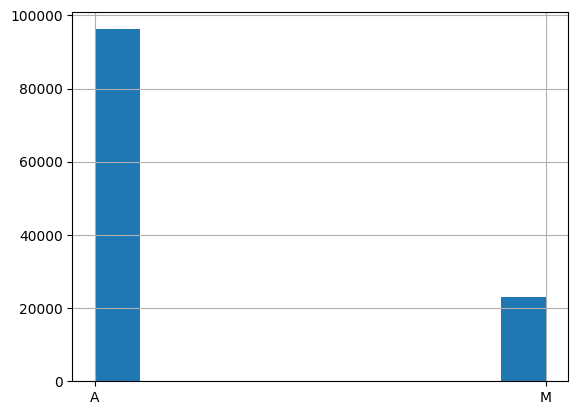

In [67]:
train['TransmisiHurufPisah'].hist()

In [65]:
train['TransmisiHurufPisah'].unique()

array(['A'], dtype=object)

In [ ]:
for col in ['']
ohe = pd.get_dummies

In [23]:
coba = train.copy(deep=True)

In [24]:
coba

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64,6.140000,7.514765,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27,30.760000,28.840000,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,1.70,2.030000,0.000000,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52,15.900000,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,NaN,Z,20.15,6.000000,13.800000,193.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,NaN,8.0,AS8,Z,33.71,12.990000,4.540000,275.0
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41,0.870000,3.961098,166.0
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99,8.380000,5.412531,181.0
137139,137140,TOYOTI,COMPACT,1.8,4.0,NaN,X,11.48,0.221407,6.400000,123.0


In [25]:
for col in train.columns[2:]:
    coba[col] = coba[col].fillna(coba[col].mode()[0])

In [26]:
temp = (coba['Fuel Consumption City'] + coba['Fuel Consumption Comb'] + coba['Fuel Consumption Hwy'])/3
coba['RataRataFuel'] = temp

<Axes: xlabel='RataRataFuel', ylabel='CO2 Emissions(g/km)'>

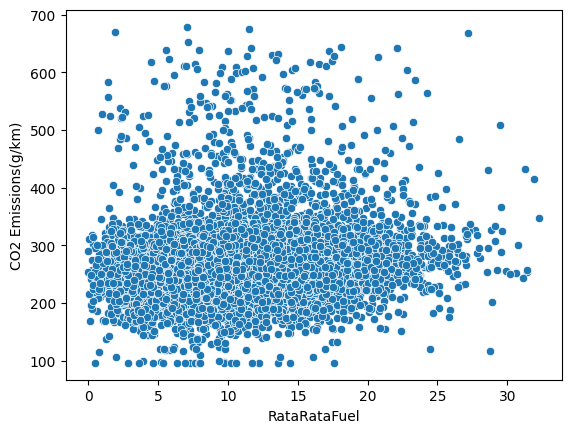

In [27]:
sns.scatterplot(x="RataRataFuel", y="CO2 Emissions(g/km)", data=coba[(coba['Engine Size(L)'] == '3.5') & (coba['Fuel Type'] == 'X')])

In [28]:
coba['Engine Size(L)'] = coba['Engine Size(L)'].astype(float)
coba['Cylinders'] = coba['Cylinders'].astype(float)

<Axes: >

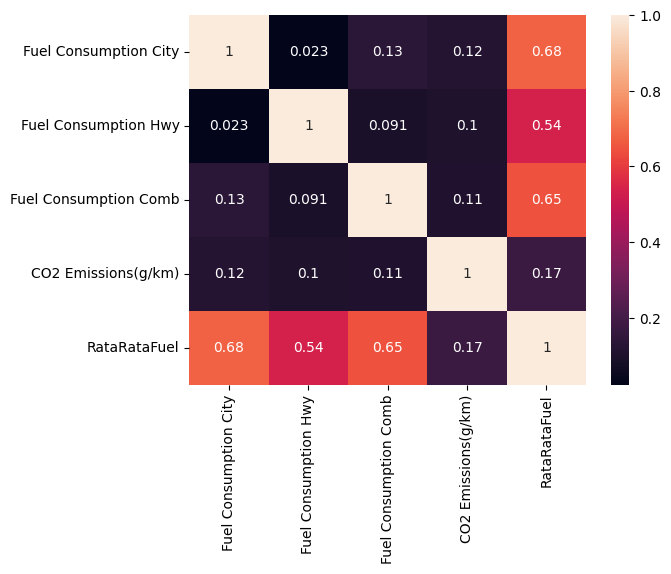

In [29]:
sns.heatmap(coba[coba.columns[-5:]].corr(), annot=True)

In [30]:
list(coba.columns[-5:])

['Fuel Consumption City',
 'Fuel Consumption Hwy',
 'Fuel Consumption Comb',
 'CO2 Emissions(g/km)',
 'RataRataFuel']

In [92]:
train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Comb Imputed,City Imputed,Hwy Imputed,TransmisiHuruf,TransmisiAngka,TransmisiHurufPisah
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64,6.140000,7.514765,306.0,False,False,False,A,6,A
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27,30.760000,28.840000,283.0,False,False,False,A,6,A
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,1.70,2.030000,0.000000,329.0,False,False,False,M,6,M
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52,15.900000,11.210000,270.0,True,False,False,AS,6,A
4,5,BARUSU,MINICOMPACT,3.0,6.0,NaN,Z,20.15,6.000000,13.800000,193.0,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,NaN,8.0,AS8,Z,33.71,12.990000,4.540000,275.0,False,False,False,AS,8,A
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41,0.870000,3.961098,166.0,False,False,False,M,6,M
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99,8.380000,5.412531,181.0,False,False,False,NaN,NaN,NaN
137139,137140,TOYOTI,COMPACT,1.8,4.0,NaN,X,11.48,0.221407,6.400000,123.0,False,False,False,NaN,NaN,NaN


In [94]:
train['VehicleClassNaN'] = train['Vehicle Class'].isnull()

In [96]:
train['VehicleClassNaN']

0         False
1         False
2         False
3         False
4         False
          ...  
137136    False
137137    False
137138    False
137139    False
137140    False
Name: VehicleClassNaN, Length: 137141, dtype: bool

In [89]:
train['Vehicle Class'].mode()[0]

'SUV - SMALL'

<Axes: >

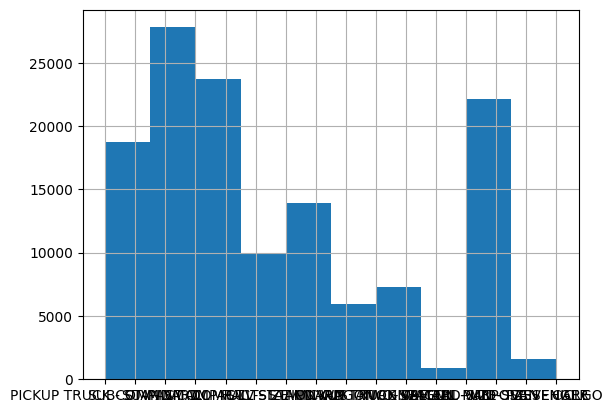

In [90]:
train['Vehicle Class'].hist()

In [91]:
train['Vehicle Class'].isnull().sum()

5132